# Hurst Exponent

In [1]:
# Import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

In [2]:
from hurst import compute_Hc, random_walk

In [3]:
# Read the previously extracted financial data. 
df = pd.read_csv("BTCUSD.csv")
#df = pd.read_csv("ETHUSD.csv")
#df = pd.read_csv("BNBUSD.csv")
#df = pd.read_csv("XRPUSD.csv")
#df = pd.read_csv("SOLUSD.csv")
#df = pd.read_csv("ADAUSD.csv")
#df = pd.read_csv("DOGEUSD.csv")
#df = pd.read_csv("DOTUSD.csv")
#df = pd.read_csv("SHIBUSD.csv")
#df = pd.read_csv("AVAXUSD.csv")

#df = df.head(650)

In [4]:
# Get the relevant information
df_prices = df[['Date','Close**']]
df_prices.columns = ['Date','Prices']
df_prices

,Date,Prices
0,"Jul 01, 2022","$19,269.37"
1,"Jun 30, 2022","$19,784.73"
2,"Jun 29, 2022","$20,104.02"
3,"Jun 28, 2022","$20,280.64"
4,"Jun 27, 2022","$20,735.48"
...,...,...
3347,"May 02, 2013",$105.21
3348,"May 01, 2013",$116.99
3349,"Apr 30, 2013",$139.00
3350,"Apr 29, 2013",$144.54


In [5]:
# Reverse the data frame to have a proper chronological order. 
df_prices=df_prices.loc[::-1]
df_prices

,Date,Prices
3351,"Apr 28, 2013",$134.21
3350,"Apr 29, 2013",$144.54
3349,"Apr 30, 2013",$139.00
3348,"May 01, 2013",$116.99
3347,"May 02, 2013",$105.21
...,...,...
4,"Jun 27, 2022","$20,735.48"
3,"Jun 28, 2022","$20,280.64"
2,"Jun 29, 2022","$20,104.02"
1,"Jun 30, 2022","$19,784.73"


In [6]:
# Set the date as index to process each day. 
df_prices.set_index(['Date'], inplace=True)
df_prices

,Prices
Date,
"Apr 28, 2013",$134.21
"Apr 29, 2013",$144.54
"Apr 30, 2013",$139.00
"May 01, 2013",$116.99
"May 02, 2013",$105.21
...,...
"Jun 27, 2022","$20,735.48"
"Jun 28, 2022","$20,280.64"
"Jun 29, 2022","$20,104.02"


In [7]:
# Get rid of the commas & dollar signs. 
df_prices['Prices'] = df_prices['Prices'].str.replace('$', '')
df_prices['Prices'] = df_prices['Prices'].str.replace(',', '')
df_prices

<ipython-input-7-c2832261f6f6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_prices['Prices'] = df_prices['Prices'].str.replace('$', '')
<ipython-input-7-c2832261f6f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Prices'] = df_prices['Prices'].str.replace('$', '')
<ipython-input-7-c2832261f6f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Prices
Date,
"Apr 28, 2013",134.21
"Apr 29, 2013",144.54
"Apr 30, 2013",139.00
"May 01, 2013",116.99
"May 02, 2013",105.21
...,...
"Jun 27, 2022",20735.48
"Jun 28, 2022",20280.64
"Jun 29, 2022",20104.02


In [8]:
# Convert the data to float. 
df_prices['Prices'] = df_prices['Prices'].astype(float)
df_prices['Prices']

<ipython-input-8-e4dcad7b2e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Prices'] = df_prices['Prices'].astype(float)


Date
Apr 28, 2013      134.21
Apr 29, 2013      144.54
Apr 30, 2013      139.00
May 01, 2013      116.99
May 02, 2013      105.21
                  ...   
Jun 27, 2022    20735.48
Jun 28, 2022    20280.64
Jun 29, 2022    20104.02
Jun 30, 2022    19784.73
Jul 01, 2022    19269.37
Name: Prices, Length: 3352, dtype: float64

In [9]:
# Calculate the returns on a daily basis. 
df_prices['Returns'] = df_prices['Prices'].pct_change()
df_prices

,Prices,Returns
Date,,
"Apr 28, 2013",134.21,NaN
"Apr 29, 2013",144.54,0.076969
"Apr 30, 2013",139.00,-0.038328
"May 01, 2013",116.99,-0.158345
"May 02, 2013",105.21,-0.100692
...,...,...
"Jun 27, 2022",20735.48,-0.013878
"Jun 28, 2022",20280.64,-0.021935
"Jun 29, 2022",20104.02,-0.008709


In [10]:
# Calculate the log prices on a daily basis. 
df_prices['LogPrices'] = np.log(df_prices['Prices'])
df_prices

,Prices,Returns,LogPrices
Date,,,
"Apr 28, 2013",134.21,NaN,4.899406
"Apr 29, 2013",144.54,0.076969,4.973556
"Apr 30, 2013",139.00,-0.038328,4.934474
"May 01, 2013",116.99,-0.158345,4.762088
"May 02, 2013",105.21,-0.100692,4.655958
...,...,...,...
"Jun 27, 2022",20735.48,-0.013878,9.939602
"Jun 28, 2022",20280.64,-0.021935,9.917422
"Jun 29, 2022",20104.02,-0.008709,9.908675


In [11]:
df_prices[['Returns']].max()

Returns    0.42968
dtype: float64

In [12]:
df_prices[['Returns']].min()

Returns   -0.371695
dtype: float64

In [13]:
# Calculate the log returns on a daily basis. 
df_prices['LogReturns'] = np.log(df_prices.Prices) - np.log(df_prices.Prices.shift(1))
# Drop the first row since it will not produce a meaningful return value.
df_prices.dropna(inplace=True)
df_prices

,Prices,Returns,LogPrices,LogReturns
Date,,,,
"Apr 29, 2013",144.54,0.076969,4.973556,0.074151
"Apr 30, 2013",139.00,-0.038328,4.934474,-0.039082
"May 01, 2013",116.99,-0.158345,4.762088,-0.172385
"May 02, 2013",105.21,-0.100692,4.655958,-0.106130
"May 03, 2013",97.75,-0.070906,4.582413,-0.073545
...,...,...,...,...
"Jun 27, 2022",20735.48,-0.013878,9.939602,-0.013975
"Jun 28, 2022",20280.64,-0.021935,9.917422,-0.022180
"Jun 29, 2022",20104.02,-0.008709,9.908675,-0.008747


In [14]:
# Describe the dataframe to have an idea on its properties and distribution. 
df_prices.describe()

,Prices,Returns,LogPrices,LogReturns
count,3351.000000,3351.000000,3351.000000,3351.000000
mean,10613.524446,0.002365,7.900779,0.001482
std,15880.584704,0.041964,1.882588,0.042090
min,68.430000,-0.371695,4.225811,-0.464730
25%,455.875000,-0.014034,6.122219,-0.014133
50%,3963.310000,0.001818,8.284835,0.001817
75%,10271.600000,0.018786,9.237138,0.018612
max,67566.830000,0.429680,11.120872,0.357451


In [15]:
df_prices

,Prices,Returns,LogPrices,LogReturns
Date,,,,
"Apr 29, 2013",144.54,0.076969,4.973556,0.074151
"Apr 30, 2013",139.00,-0.038328,4.934474,-0.039082
"May 01, 2013",116.99,-0.158345,4.762088,-0.172385
"May 02, 2013",105.21,-0.100692,4.655958,-0.106130
"May 03, 2013",97.75,-0.070906,4.582413,-0.073545
...,...,...,...,...
"Jun 27, 2022",20735.48,-0.013878,9.939602,-0.013975
"Jun 28, 2022",20280.64,-0.021935,9.917422,-0.022180
"Jun 29, 2022",20104.02,-0.008709,9.908675,-0.008747


In [16]:
# Define a function to calculate the hurst exponent from an input time series. 
def get_hurst_exponent(time_series, max_lag=100):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)



   # variances of the lagged differences
    std_dev = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]



   # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(std_dev), 1)



    return reg[0]

In [17]:
# Try several lag values and see the hurst exponent outcomes. 
#for lag in [ 4, 8, 16, 32, 100, 300, 500, 1000]:
#    hurst_exp = get_hurst_exponent(df_prices["LogReturns"].values, lag)
#    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

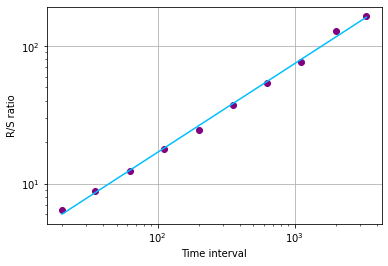

H=0.6423, c=0.8807


In [18]:
# Calculate the H and c values for 'Log Returns' time series. 
H, c, data = compute_Hc(df_prices['LogReturns'].values, kind='change', simplified=True, min_window=20, max_window=None)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()



print("H={:.4f}, c={:.4f}".format(H,c))